In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns # for visualiation
from scipy.stats import ttest_ind # t-tests
import altair as alt
alt.renderers.enable('notebook') # enable altair rendering
import statsmodels.formula.api as smf # linear modeling

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data
data = pd.read_csv('data/dengue_features_train.csv')
outcome = pd.read_csv('data/dengue_labels_train.csv')
total = data
total['total_cases'] = outcome['total_cases']

In [3]:
total.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


# Total Cases

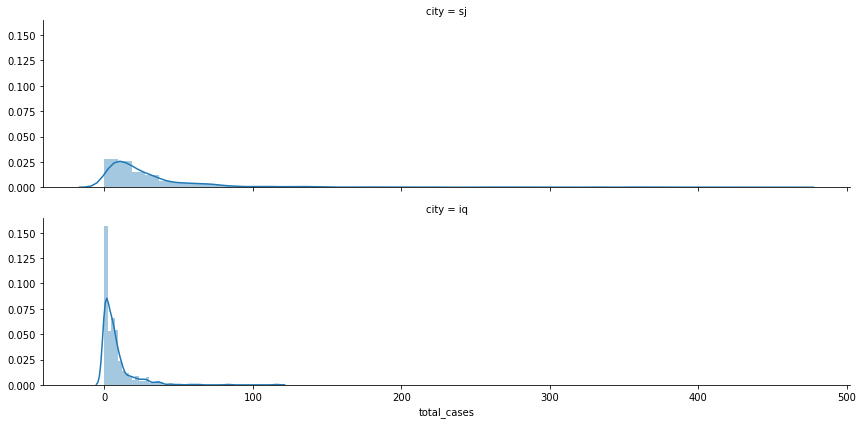

In [4]:
g = sns.FacetGrid(data = total, row="city", aspect=4)
g.map(sns.distplot, "total_cases");

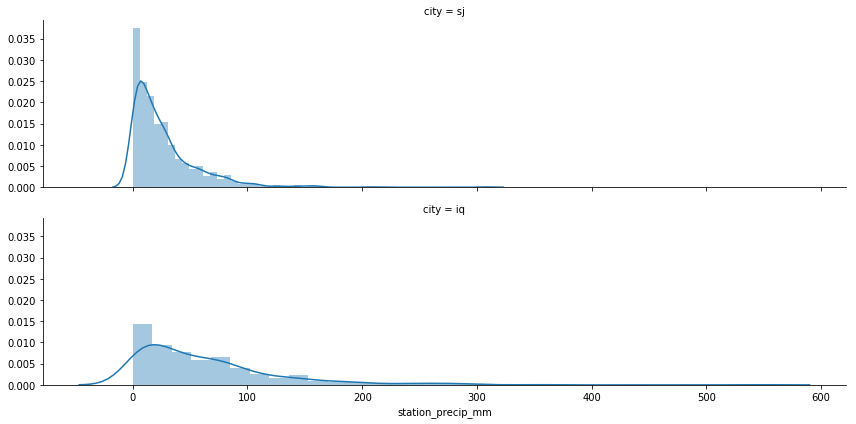

In [11]:
# Total precipitation (NOAA's GHCN daily climate data)

g = sns.FacetGrid(data = total, row="city", aspect=4)
g.map(sns.distplot, "station_precip_mm");

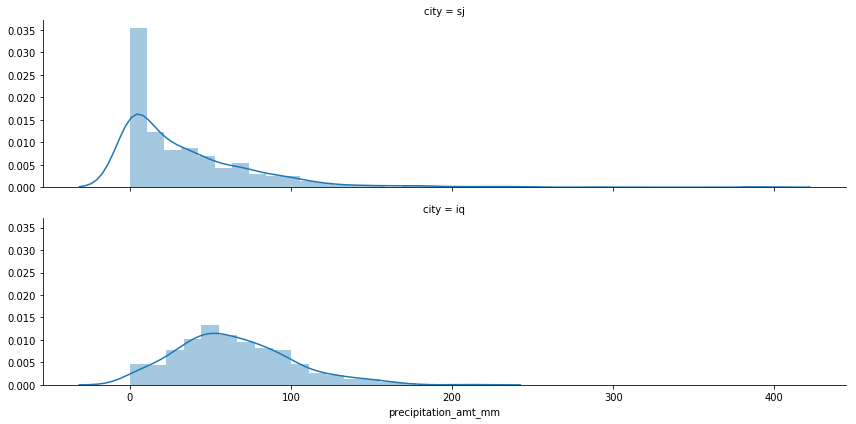

In [12]:
# Total precipitation (PERSIANN satellite)

g = sns.FacetGrid(data = total, row="city", aspect=4)
g.map(sns.distplot, "precipitation_amt_mm");

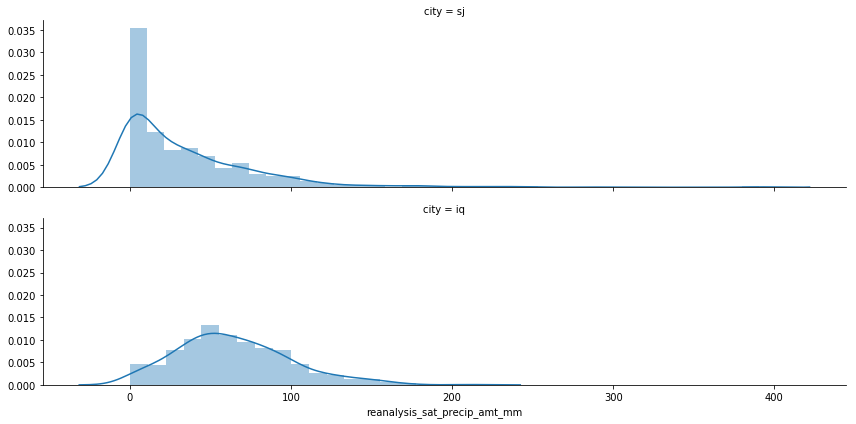

In [37]:
# Total precipitation (NOAA's NCEP Climate Forecast System Reanalysis)

g = sns.FacetGrid(data = total, row="city", aspect=4)
g.map(sns.distplot, "reanalysis_sat_precip_amt_mm");

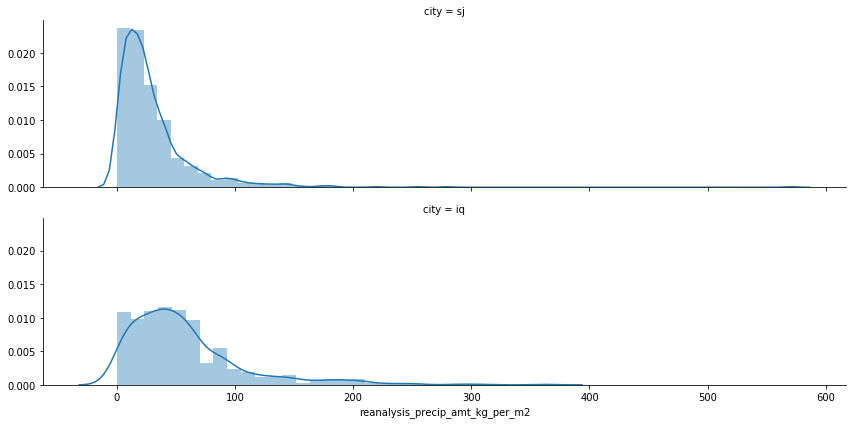

In [38]:
# Total precipitation (NOAA's NCEP Climate Forecast System Reanalysis)
# a slightly different data

g = sns.FacetGrid(data = total, row="city", aspect=4)
g.map(sns.distplot, "reanalysis_precip_amt_kg_per_m2");

# Temperature

### Maximum temperature

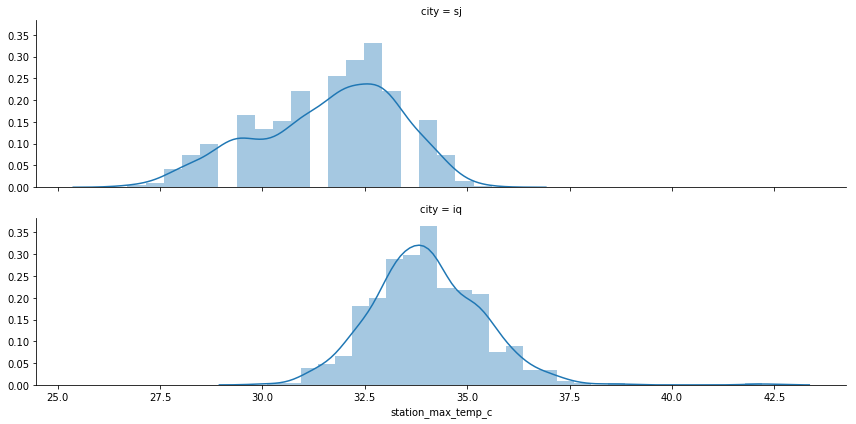

In [15]:
# NOAA's GHCN daily climate data weather station

g = sns.FacetGrid(data = total, row="city", aspect=4)
g.map(sns.distplot, "station_max_temp_c");

# Iquitos is hotter on average

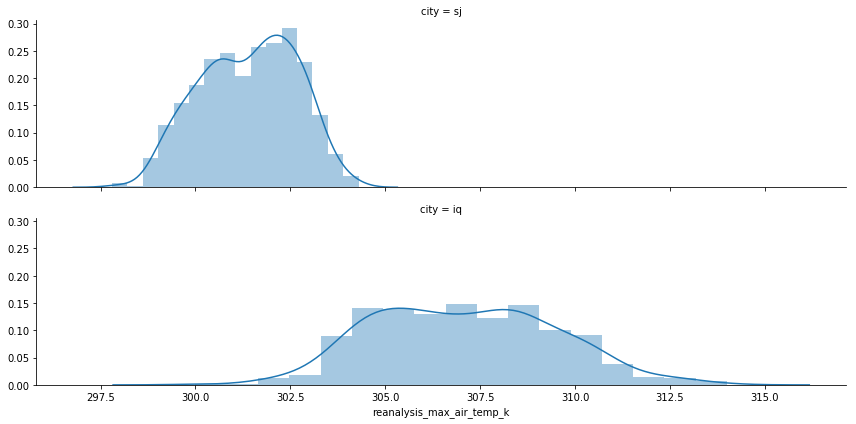

In [16]:
# NOAA's NCEP Climate Forecast System Reanalysis
# Maximum air temperature

g = sns.FacetGrid(data = total, row="city", aspect=4)
g.map(sns.distplot, "reanalysis_max_air_temp_k");

### Minimum temperature

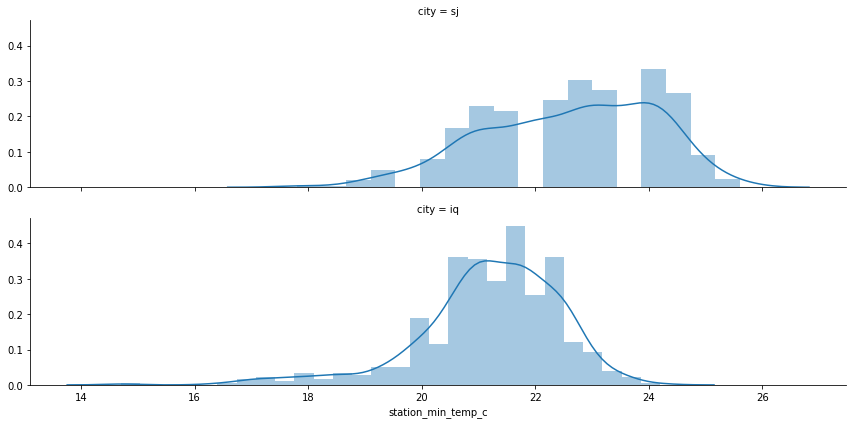

In [17]:
# NOAA's GHCN daily climate data weather station

g = sns.FacetGrid(data = total, row="city", aspect=4)
g.map(sns.distplot, "station_min_temp_c");

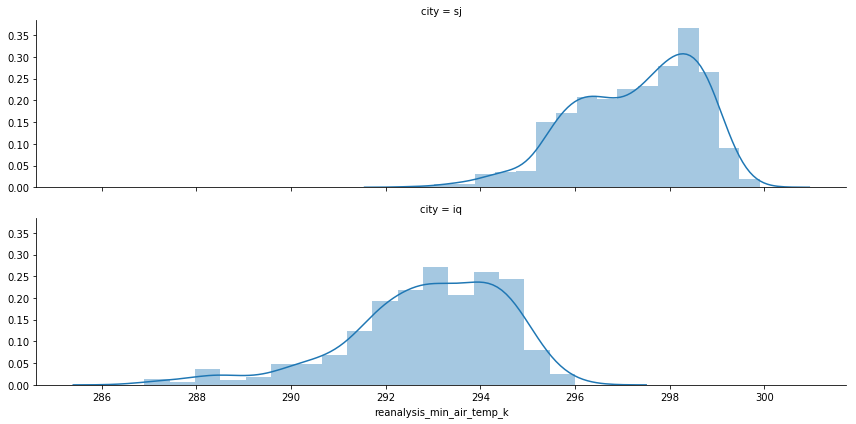

In [18]:
# NOAA's NCEP Climate Forecast System Reanalysis
# Minimum air temperature

g = sns.FacetGrid(data = total, row="city", aspect=4)
g.map(sns.distplot, "reanalysis_min_air_temp_k");

### Average Temperature

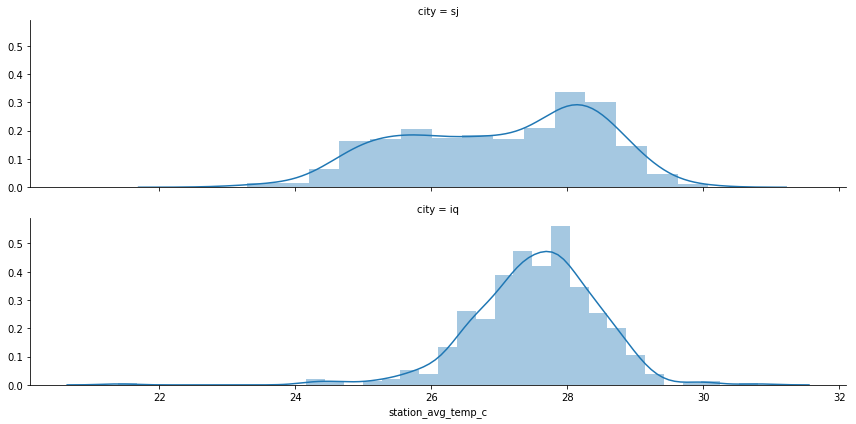

In [19]:
# NOAA's GHCN daily climate data weather station

g = sns.FacetGrid(data = total, row="city", aspect=4)
g.map(sns.distplot, "station_avg_temp_c");

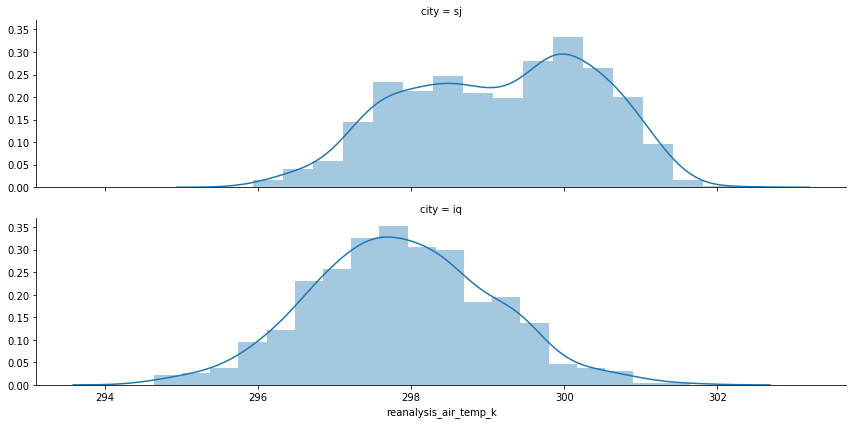

In [20]:
# NOAA's NCEP Climate Forecast System Reanalysis
# Mean air temperature

g = sns.FacetGrid(data = total, row="city", aspect=4)
g.map(sns.distplot, "reanalysis_air_temp_k");

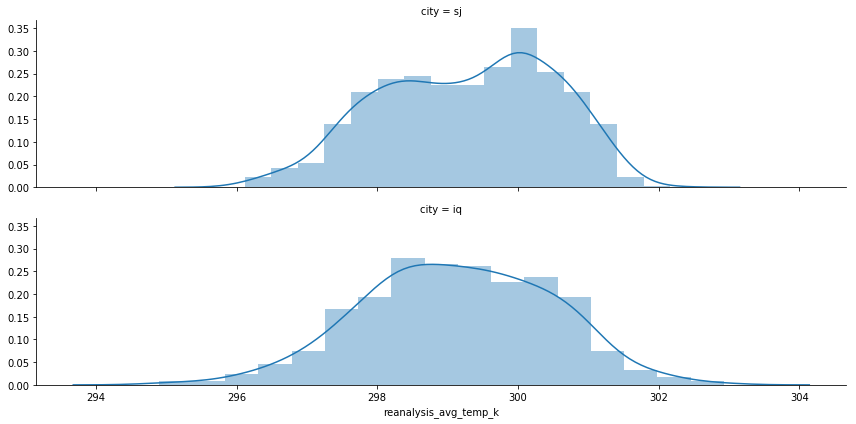

In [21]:
# NOAA's NCEP Climate Forecast System Reanalysis
# Average air temperature

g = sns.FacetGrid(data = total, row="city", aspect=4)
g.map(sns.distplot, "reanalysis_avg_temp_k");

### Diurnal Temperature Range

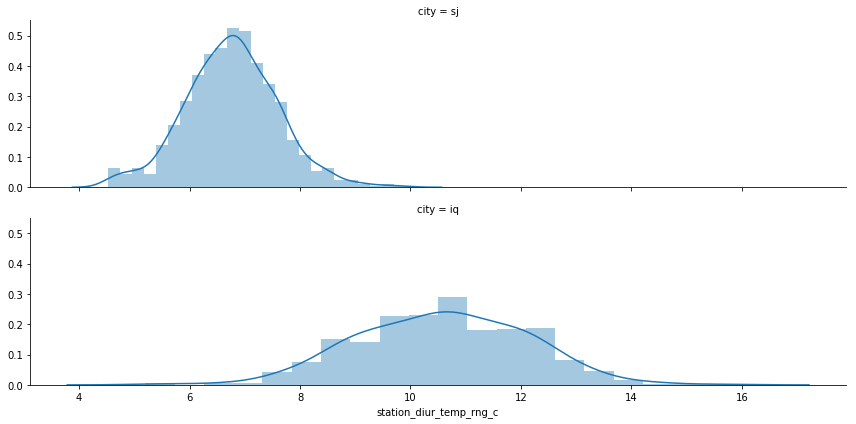

In [22]:
# NOAA's GHCN daily climate data weather station

g = sns.FacetGrid(data = total, row="city", aspect=4)
g.map(sns.distplot, "station_diur_temp_rng_c");

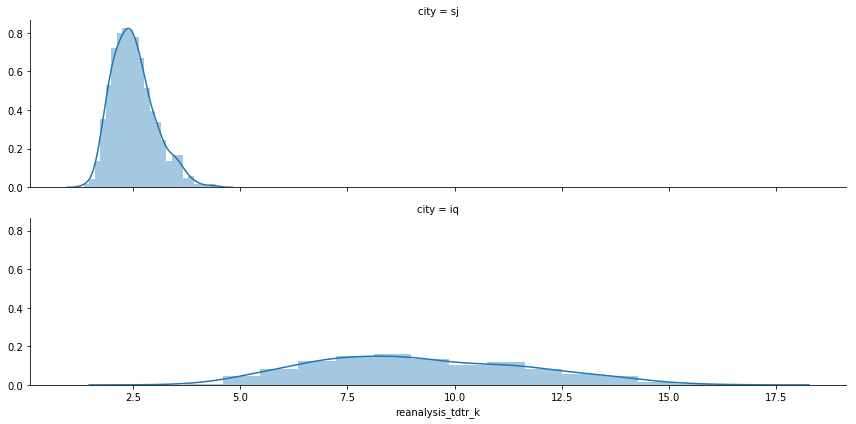

In [23]:
# NOAA's NCEP Climate Forecast System Reanalysis

g = sns.FacetGrid(data = total, row="city", aspect=4)
g.map(sns.distplot, "reanalysis_tdtr_k");

### Mean Dew Point Temperature

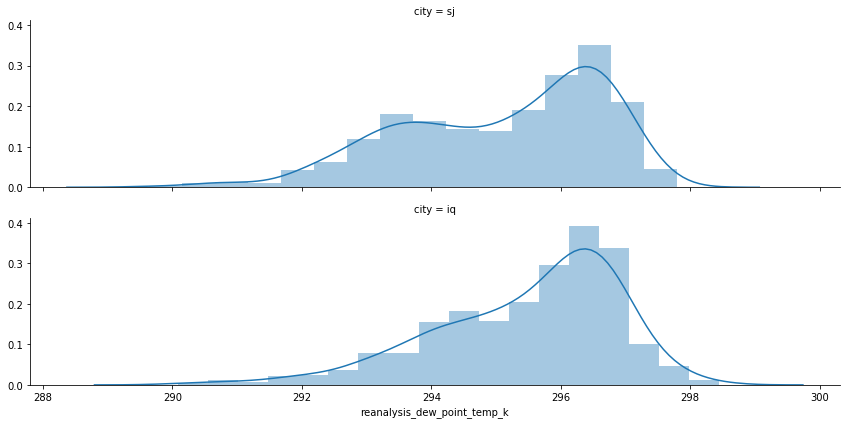

In [24]:
# NOAA's NCEP Climate Forecast System Reanalysis

g = sns.FacetGrid(data = total, row="city", aspect=4)
g.map(sns.distplot, "reanalysis_dew_point_temp_k");

# very similar

# Humidity

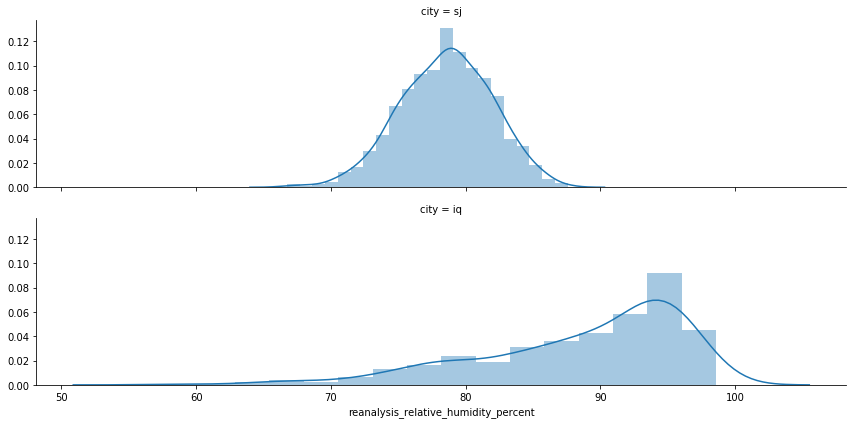

In [25]:
# NOAA's NCEP Climate Forecast System Reanalysis
# Mean relative humidity

g = sns.FacetGrid(data = total, row="city", aspect=4)
g.map(sns.distplot, "reanalysis_relative_humidity_percent");

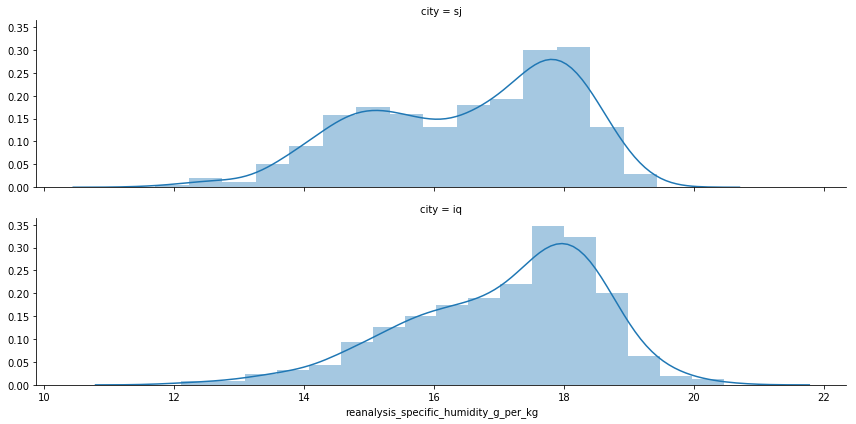

In [26]:
# NOAA's NCEP Climate Forecast System Reanalysis
# Mean specific humidity

g = sns.FacetGrid(data = total, row="city", aspect=4)
g.map(sns.distplot, "reanalysis_specific_humidity_g_per_kg");

# very similar

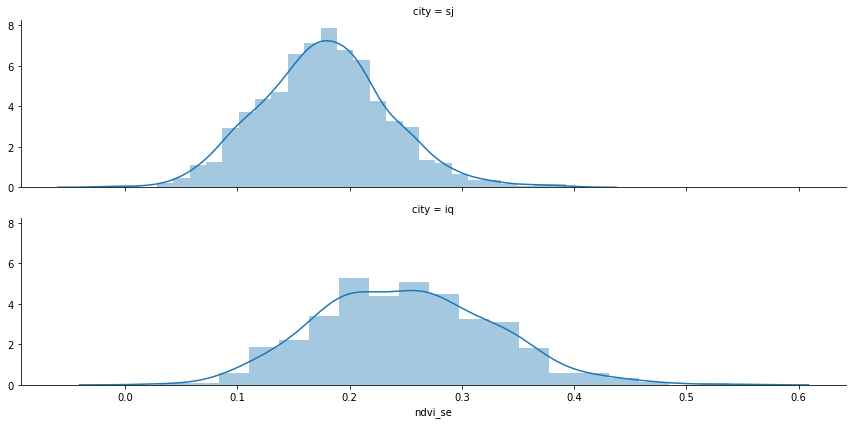

In [27]:
g = sns.FacetGrid(data = total, row="city", aspect=4)
g.map(sns.distplot, "ndvi_se");

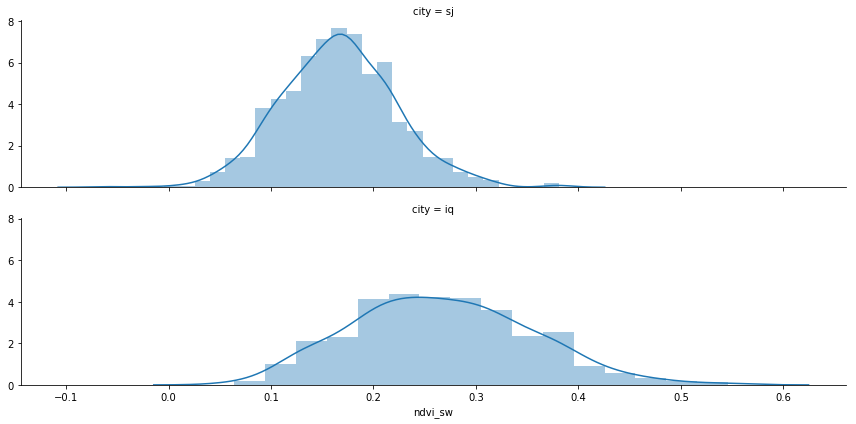

In [28]:
g = sns.FacetGrid(data = total, row="city", aspect=4)
g.map(sns.distplot, "ndvi_sw");

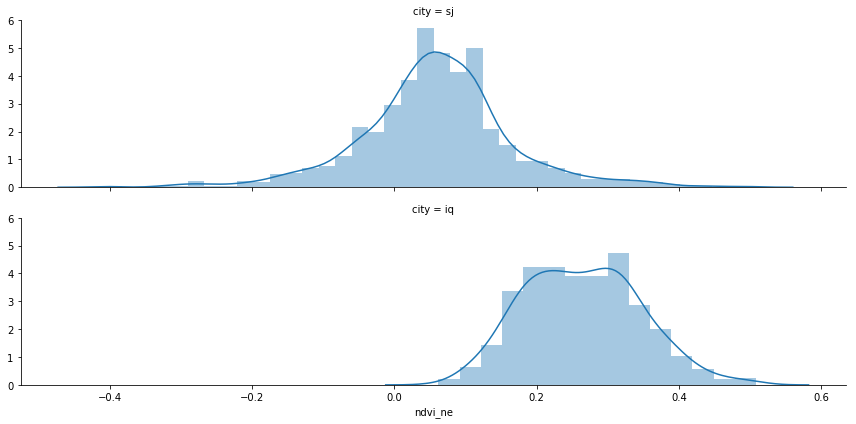

In [29]:
g = sns.FacetGrid(data = total, row="city", aspect=4)
g.map(sns.distplot, "ndvi_ne");

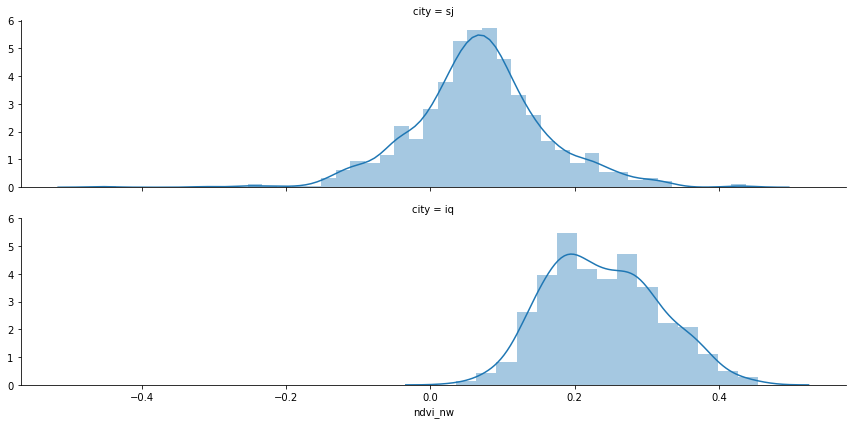

In [30]:
g = sns.FacetGrid(data = total, row="city", aspect=4)
g.map(sns.distplot, "ndvi_nw");